In [1]:
%pylab inline
from __future__ import print_function

Populating the interactive namespace from numpy and matplotlib


# Transcription (`pyannote.core.transcription.Transcription`)

**`Transcription`** instances are used to describe (mostly textual) temporally ordered transcription of documents.  
They are also known as **annotation graphs**.  
For instance, one can use a **`Transcription`** to store the script of an episode of *The Big Bang Theory* TV series.

In [2]:
from pyannote.core import Transcription

In [3]:
transcription = Transcription()

For instance, to represent a dialogue between Penny and Leonard, we could do the following:

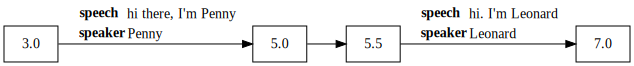

In [4]:
transcription.add_edge(3, 5, speech="hi there, I'm Penny", speaker='Penny')
transcription.add_edge(5, 5.5)
transcription.add_edge(5.5, 7, speech="hi. I'm Leonard", speaker='Leonard')
transcription

It sometimes happens that we don't know exactly when an edge starts and/or when it ends.  
One can use *drifting* timestamps to do that (as opposed to *anchored* timestamps whose temporal position is fixed).

**T** automatically generates a new drifting label every time it is called.  

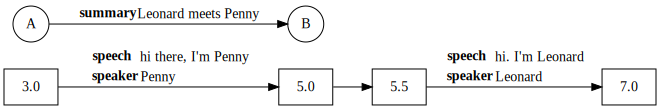

In [5]:
from pyannote.core import T
T.reset()  # reset label generator to 'A'
t1, t2 = T(), T()
transcription.add_edge(t1, t2, summary='Leonard meets Penny')
transcription

As you can see, the transcription is divided into two subgraphs.  
We might want to indicate that 'Leonard meets Penny' actually starts with Penny's first line:  

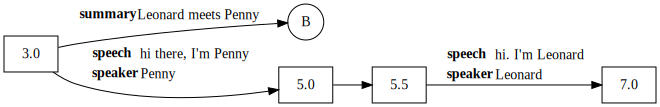

In [6]:
transcription.align('A', 3)
transcription

Also, to indicate that Leonard's line ends before 'Leonard meets Penny' ends, one can just add an empty edge as follows:   

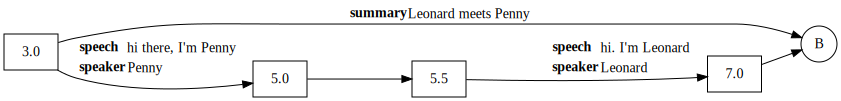

In [7]:
transcription.add_edge(7, 'B')
transcription

**Transcription** is a subclass of **networkx.[MultiDiGraph](http://networkx.github.io/documentation/latest/reference/classes.multidigraph.html)** - as such, it inherits all its methods.  
You might want to have a look at **networkx** [documentation](http://networkx.github.io/documentation/latest/).

For instance, to iterate over all edges, one can use the following:

In [8]:
for start_time, end_time, data in transcription.edges_iter(data=True):
    print(start_time, '-->', end_time, '|', data)

5.5 --> 7.0 | {'speech': "hi. I'm Leonard", 'speaker': 'Leonard'}
5.0 --> 5.5 | {}
7.0 --> B | {}
3.0 --> B | {'summary': 'Leonard meets Penny'}
3.0 --> 5.0 | {'speech': "hi there, I'm Penny", 'speaker': 'Penny'}


However, we might want to get all timestamps (drifting and anchored) in chronological order...

In [9]:
transcription.temporal_sort()

[3.0, 5.0, 5.5, 7.0, 'B']

... or iterate edges in chronological order:  

In [10]:
for start_time, end_time, data in transcription.ordered_edges_iter(data=True):
    print(start_time, '-->', end_time, '|', data)

3.0 --> B | {'summary': 'Leonard meets Penny'}
3.0 --> 5.0 | {'speech': "hi there, I'm Penny", 'speaker': 'Penny'}
5.0 --> 5.5 | {}
5.5 --> 7.0 | {'speech': "hi. I'm Leonard", 'speaker': 'Leonard'}
7.0 --> B | {}


## Need help?

You can always try the following...  
Who knows? It might give you the information you are looking for!

In [11]:
help(Transcription)

Help on class Transcription in module pyannote.core.transcription:

class Transcription(networkx.classes.multidigraph.MultiDiGraph)
 |  Transcription stored as annotation graph
 |  
 |  Method resolution order:
 |      Transcription
 |      networkx.classes.multidigraph.MultiDiGraph
 |      networkx.classes.multigraph.MultiGraph
 |      networkx.classes.digraph.DiGraph
 |      networkx.classes.graph.Graph
 |      __builtin__.object
 |  
 |  Methods defined here:
 |  
 |  __init__(self, graph=None, **attrs)
 |  
 |  add_edge(self, t1, t2, key=None, attr_dict=None, **attrs)
 |      Add annotation to the graph between times t1 and t2
 |      
 |      Parameters
 |      ----------
 |      t1, t2: float, str or None
 |      data : dict, optional
 |          {annotation_type: annotation_value} dictionary
 |      
 |      Example
 |      -------
 |      >>> G = Transcription()
 |      >>> G.add_edge(T(1.), T(), speaker='John', 'speech'='Hello world!')
 |  
 |  align(self, one_t, another_t)
 |